# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [225]:
# Import Libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

In [226]:
# Load data
df = pd.read_csv('Wholesale_Data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### EDA

##### 1. Data Cleaning

In [227]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [228]:
df.shape

(440, 8)

In [229]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [231]:
num_feats = list(df.columns.drop(['Channel', 'Region']))
cat_feats = list(df.columns[df.columns.isin(['Channel', 'Region'])])

In [232]:
# Check missing values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [349]:
# Check for duplicated values
df[df.duplicated()]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


##### 2. Data Visualization


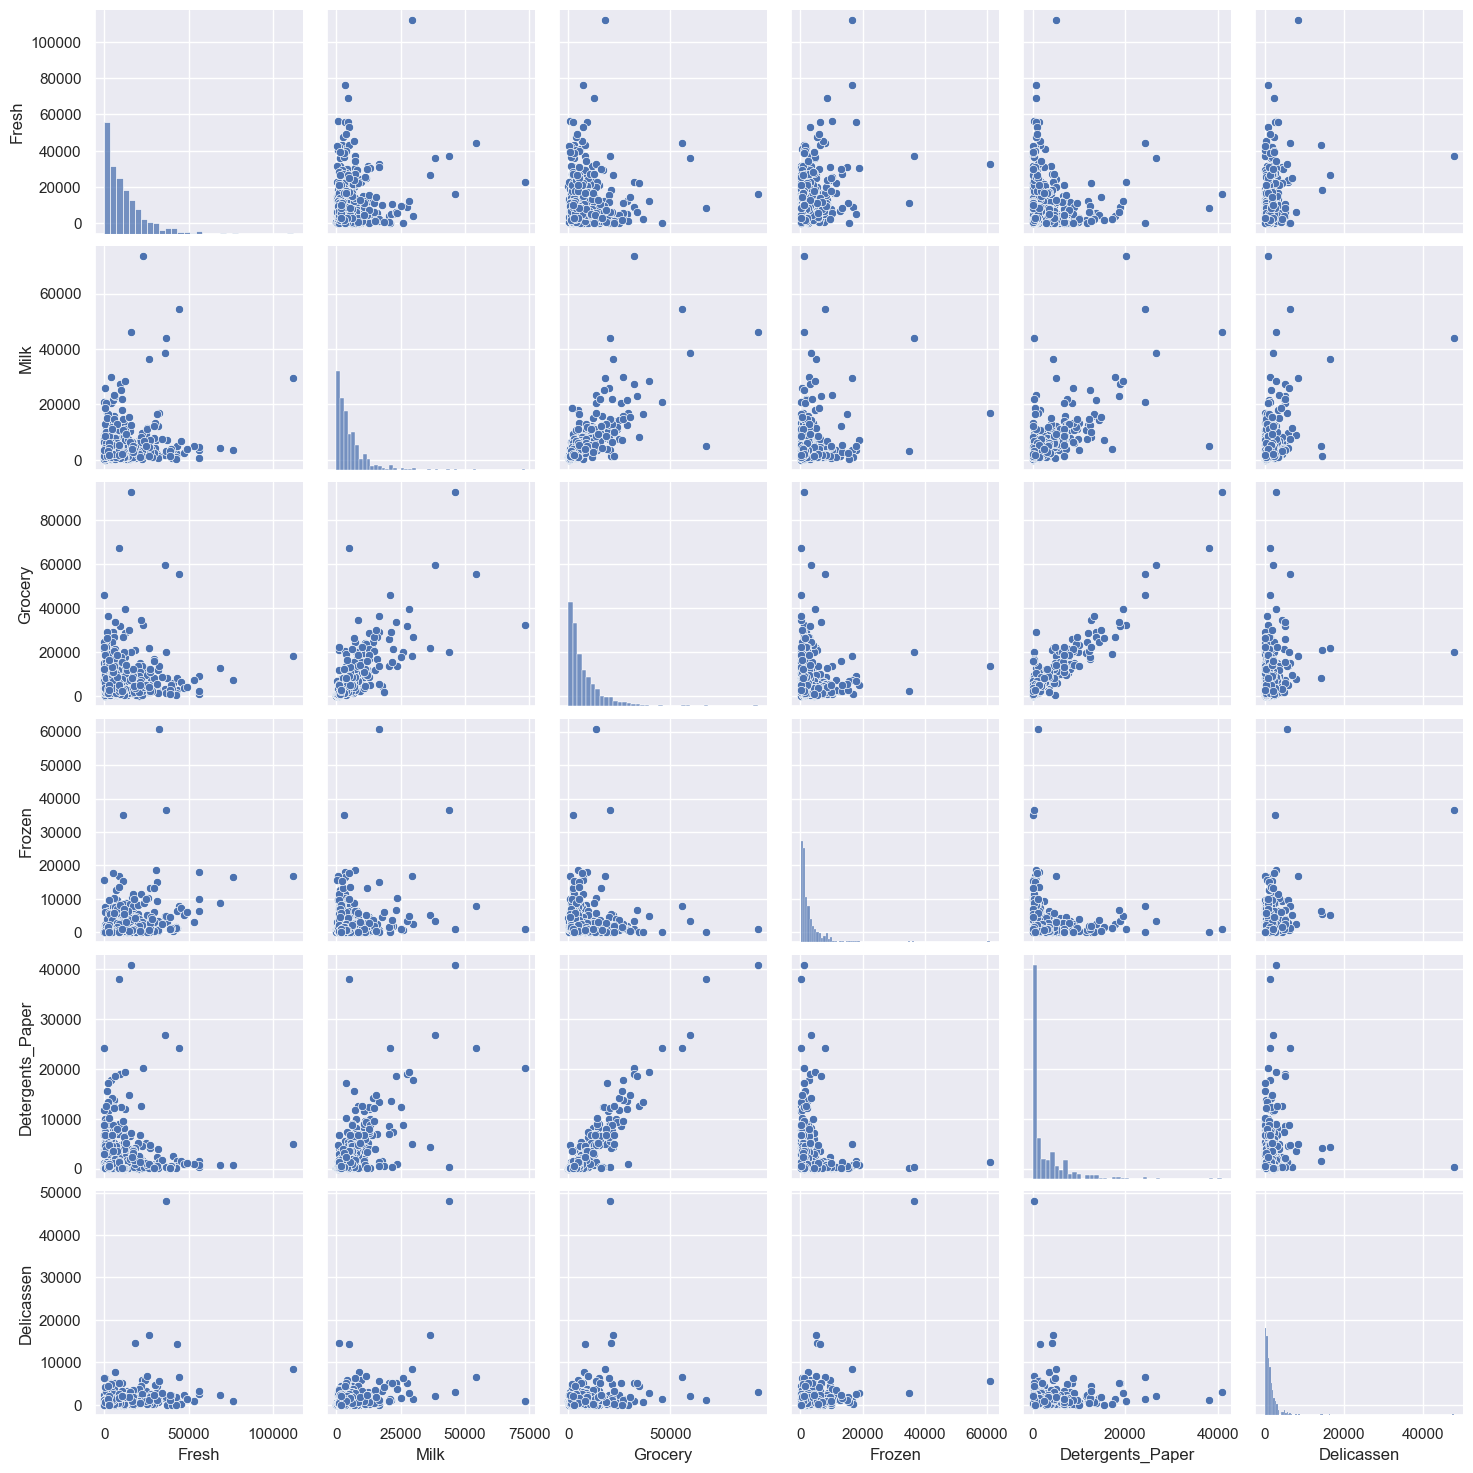

In [233]:
# pairplot
sns.pairplot(df[num_feats])

Note:
- `Grocery` and `Milk` has some correlation
- `Grocery` and `Detergents_Paper` has strong correlation
- `Region` and `Channel` are classification relations

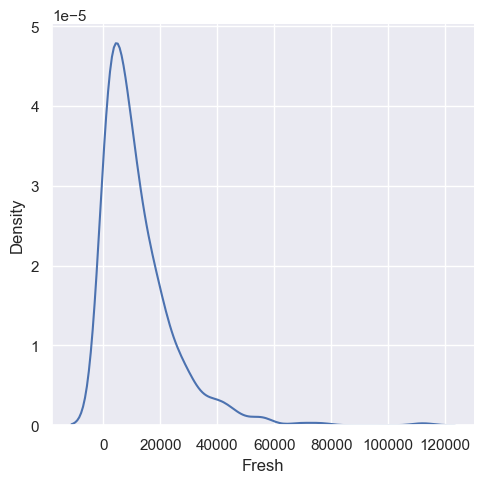

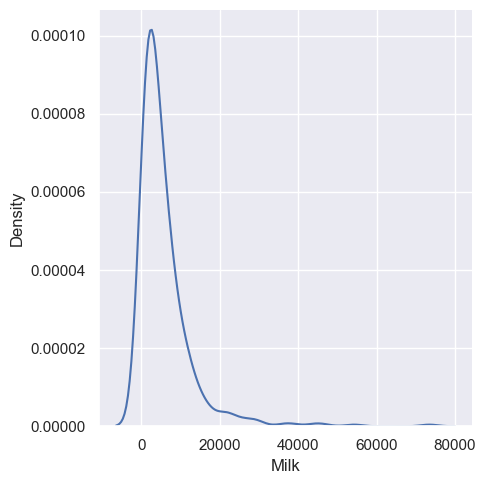

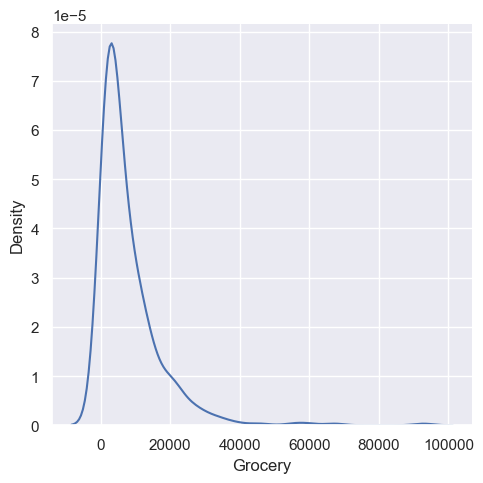

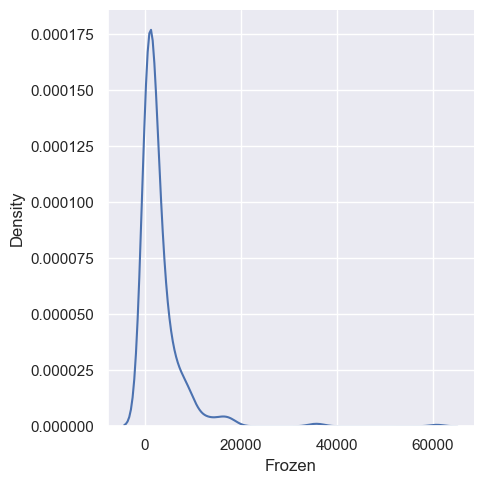

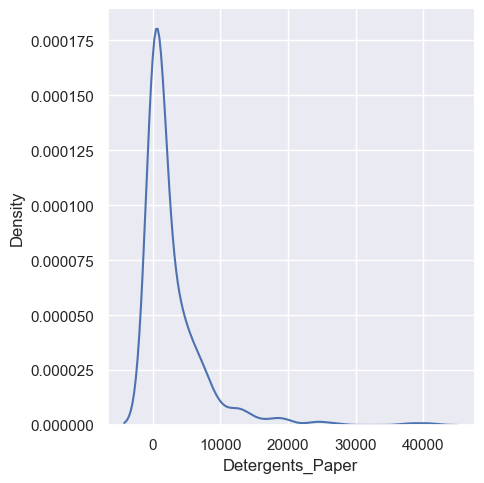

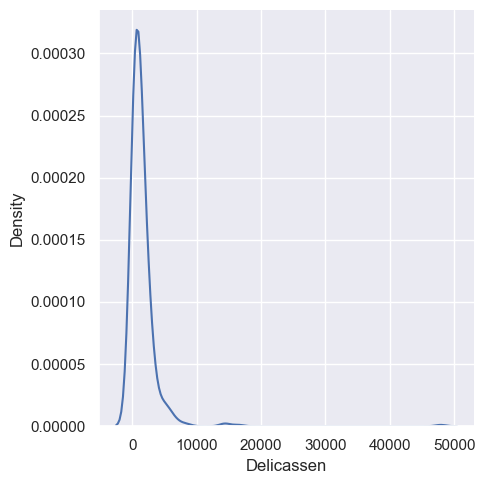

In [234]:
# set theme
sns.set_theme()
# check the distribution of numerical features
for col in num_feats:
    sns.displot(df[col], kind='kde')

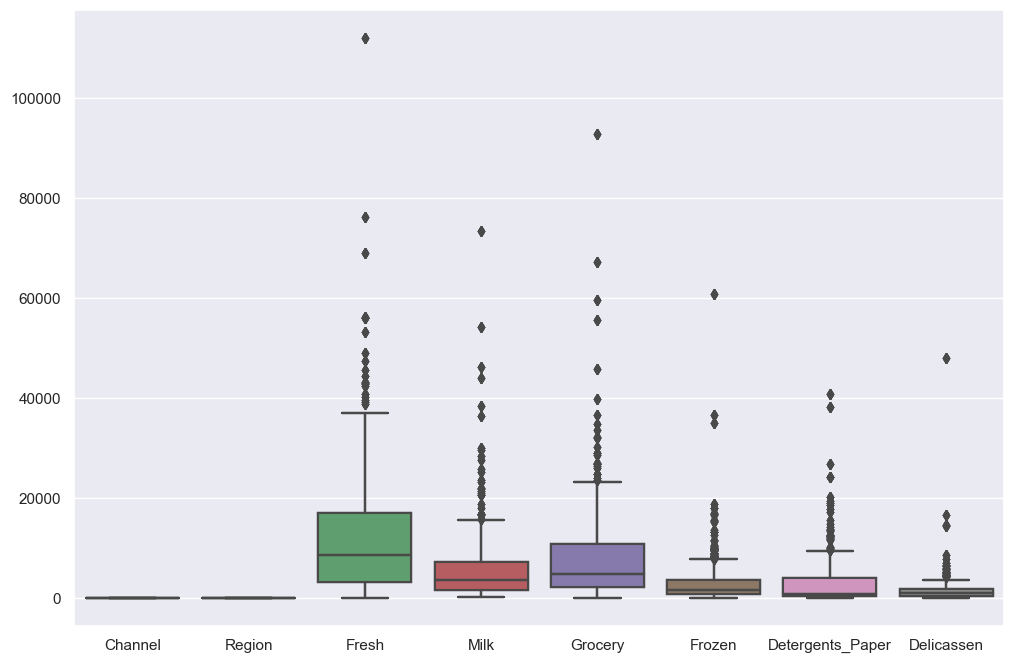

In [235]:
plt.figure(figsize=(12,8))
for col in num_feats:
    sns.boxplot(df)

In [236]:
# Function to detect outliers
def detect_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = dataframe[(dataframe[column] < Q1 - 1.5*IQR) | (dataframe[column] > Q3 + 1.5*IQR)]
    return outliers

# Detect and print number of outliers for each feature
for column in df.columns:
    outliers = detect_outliers(df, column)
    print(f'Number of outliers in {column}: {len(outliers)}')

Number of outliers in Channel: 0
Number of outliers in Region: 0
Number of outliers in Fresh: 20
Number of outliers in Milk: 28
Number of outliers in Grocery: 24
Number of outliers in Frozen: 43
Number of outliers in Detergents_Paper: 30
Number of outliers in Delicassen: 27


In [237]:
def handle_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    dataframe[column] = dataframe[column].apply(lambda x: upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)

# Handle outliers for each feature
for column in df.columns:
    handle_outliers(df, column)

In [238]:
# Detect and print number of outliers for each feature
for column in df.columns:
    outliers = detect_outliers(df, column)
    print(f'Number of outliers in {column}: {len(outliers)}')

Number of outliers in Channel: 0
Number of outliers in Region: 0
Number of outliers in Fresh: 0
Number of outliers in Milk: 0
Number of outliers in Grocery: 0
Number of outliers in Frozen: 0
Number of outliers in Detergents_Paper: 0
Number of outliers in Delicassen: 0


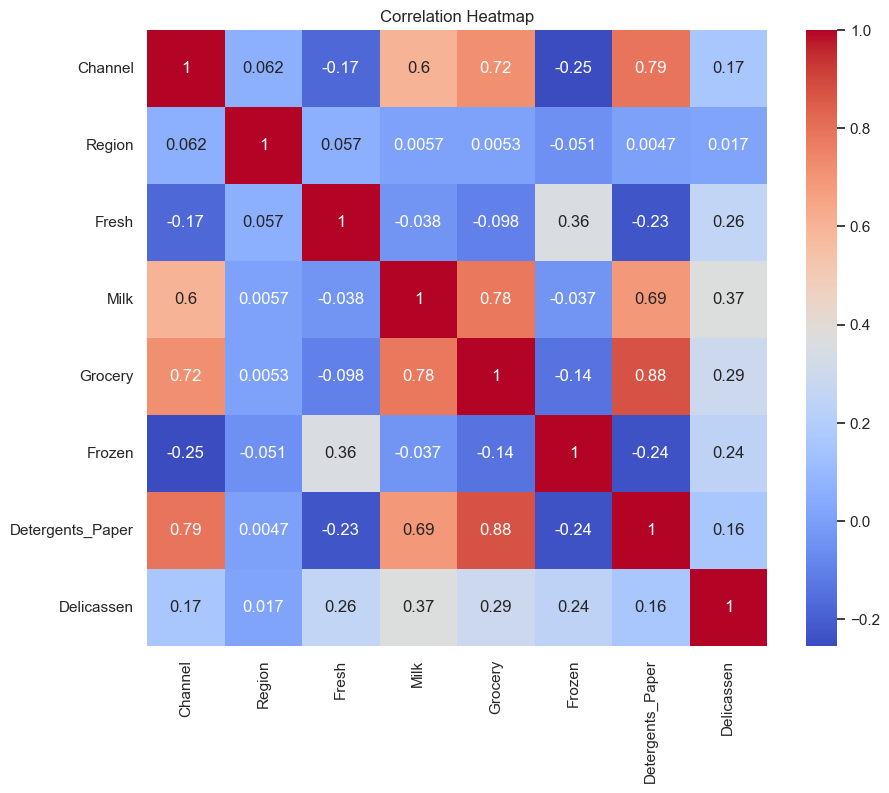

In [239]:
# Heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Note for Data Cleaning
- There are 440 datapoints
- There are 8 features, including 2 categorical features (`Channel`, `Region`) and 6 numerical features
- There is no missing values
- There is no duplicated values
- There are outliers in numerical features, which should be handled

#### Data Preprocessing

In [240]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [241]:
df_scaled

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892
1,1.448652,0.590668,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759
2,1.448652,0.590668,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440
3,-0.690297,0.590668,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851
4,1.448652,0.590668,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.798584,1.598216,1.334130,2.188748,-0.752563,0.866381
436,-0.690297,0.590668,2.576996,-0.825672,-0.982295,0.832619,-0.782861,0.997640
437,1.448652,0.590668,0.311123,2.382670,2.454609,-0.860542,2.392299,0.554875
438,-0.690297,0.590668,-0.104664,-0.700141,-0.759501,-0.610704,-0.757329,0.793358


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [260]:
# Import Library
from sklearn.cluster import KMeans

# Set the features
X = df_scaled[num_feats]

In [261]:
# Define function to find the optimum number of cluster
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

c:\Users\thong.lam\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\thong.lam\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\thong.lam\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\thong.lam\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmea

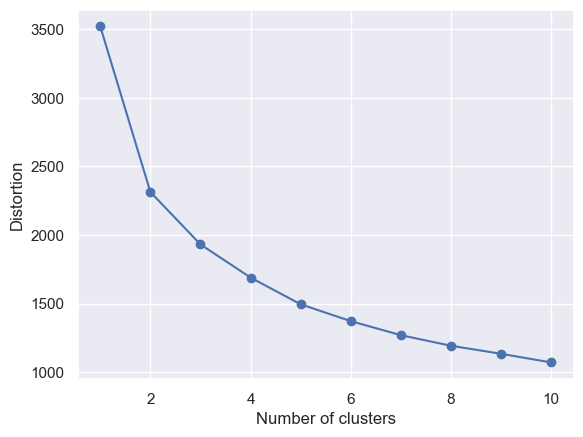

In [350]:
# Plot the chart using elbow rule
plot_distortion(X,max_clusters=10)

Notes: 
- We can see after 6 the change of the curve become little.
- We can choose either 5 or 6 in this case for clustering

In [369]:
# Fit the model

km = KMeans(n_clusters=5, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km_5 = km.fit_predict(X)

# Get cluster labels
cluster_labels = km.labels_

df_scaled['Cluster'] = cluster_labels

print(df_scaled.head())

c:\Users\thong.lam\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.128573  1.051586  0.049267 -0.953244   
1  1.448652  0.590668 -0.421627  1.086735  0.353865 -0.309735   
2  1.448652  0.590668 -0.490647  0.858040  0.067935 -0.042437   
3 -0.690297  0.590668  0.187004 -0.879308 -0.457635  1.619962   
4  1.448652  0.590668  1.103677  0.082487 -0.005824  0.585275   

   Detergents_Paper  Delicassen  Cluster  
0          0.095792    0.065892        0  
1          0.306519    0.470759        0  
2          0.382435    2.469440        0  
3         -0.641923    0.481851        2  
4         -0.209575    2.469440        2  


In [370]:
 def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [371]:
# y_kmeans give us different clusters corrponding to each datapoints
y_km_5

array([0, 0, 0, 2, 2, 0, 0, 0, 1, 3, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       2, 3, 0, 0, 1, 1, 3, 1, 2, 1, 1, 2, 1, 0, 2, 0, 3, 2, 2, 2, 0, 3,
       0, 3, 3, 3, 0, 3, 1, 1, 0, 0, 1, 1, 3, 0, 1, 1, 0, 3, 0, 3, 1, 3,
       1, 0, 2, 1, 2, 2, 1, 2, 0, 1, 1, 3, 1, 1, 1, 0, 0, 1, 0, 3, 3, 2,
       1, 2, 1, 2, 3, 2, 0, 1, 0, 1, 1, 1, 0, 3, 0, 2, 1, 1, 0, 3, 0, 3,
       1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 0, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 0, 1, 0, 0, 0, 1, 1, 3, 0, 3, 0, 1, 1, 1, 0, 3, 1, 3, 1, 0,
       2, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0,
       4, 4, 3, 3, 2, 4, 4, 3, 4, 4, 4, 3, 4, 3, 4, 4, 0, 3, 3, 4, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4,
       3, 2, 3, 4, 3, 4, 4, 4, 4, 2, 1, 1, 2, 1, 2, 0, 1, 0, 2, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 4, 0, 4, 0, 0, 1, 0,

Testing the result with Silhoutte Score

In [372]:
from sklearn.metrics import silhouette_samples, silhouette_score
# Calculate Silhoutte Score
#
score = silhouette_score(X, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.263


Note:
- The Silhouetter Score > 0 indicates that the sample is quite closed from the neighboring clusters but the clusters are assigned correctly

Plot test with 2 features

In [354]:
# let's plot the 2 features 'Grocery' and 'Milk'
df_test = df_scaled[['Milk', 'Grocery']].values

In [356]:
# Fit the model

km = KMeans(n_clusters=5, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km_5 = km.fit_predict(df_test)


c:\Users\thong.lam\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


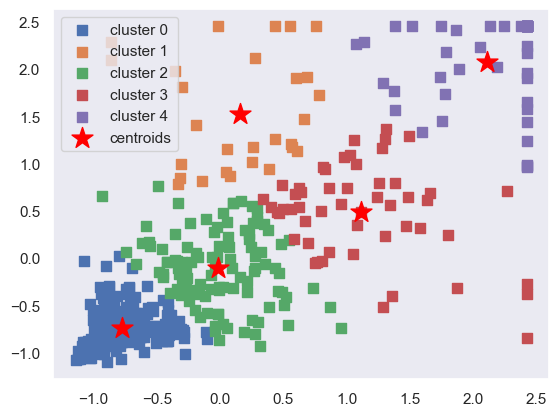

In [357]:
plot_clusters(df_test, y_km_5, plt_cluster_centers= True)


Notes: The K-means works well with number of cluster 5

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [326]:
import scipy.cluster.hierarchy as sch

In [327]:
X = df_scaled.drop('Cluster', axis=1)

In [328]:
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892
1,1.448652,0.590668,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759
2,1.448652,0.590668,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440
3,-0.690297,0.590668,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851
4,1.448652,0.590668,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.798584,1.598216,1.334130,2.188748,-0.752563,0.866381
436,-0.690297,0.590668,2.576996,-0.825672,-0.982295,0.832619,-0.782861,0.997640
437,1.448652,0.590668,0.311123,2.382670,2.454609,-0.860542,2.392299,0.554875
438,-0.690297,0.590668,-0.104664,-0.700141,-0.759501,-0.610704,-0.757329,0.793358


In [329]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='complete'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

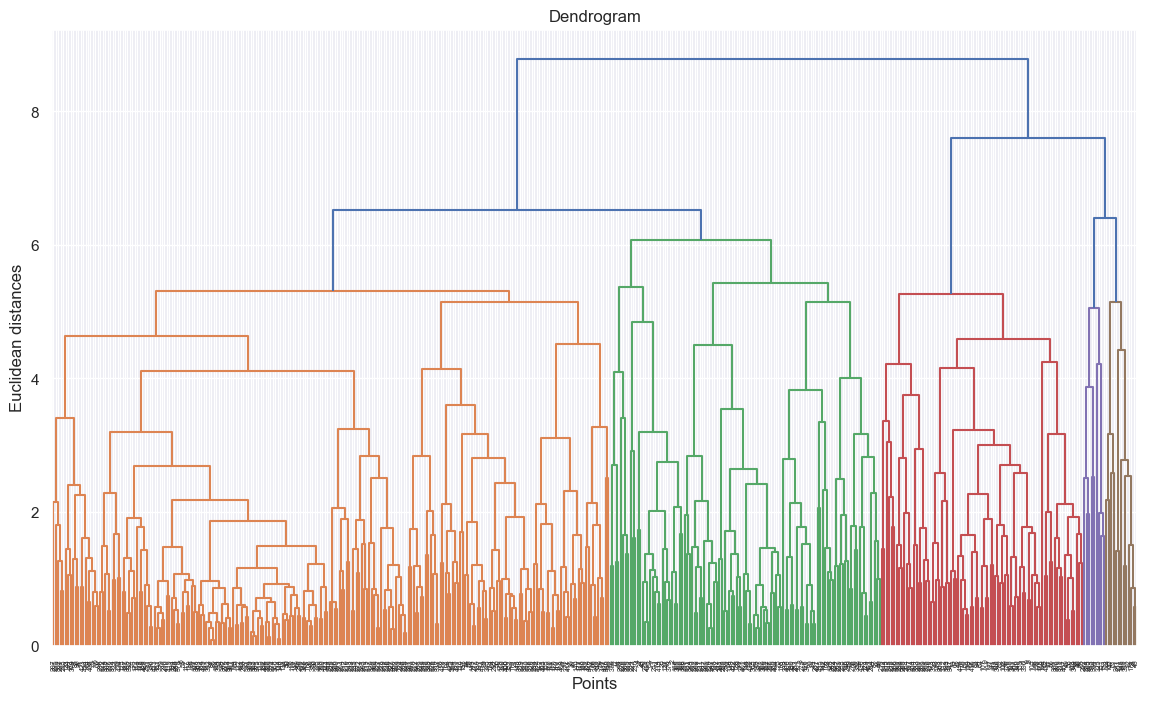

In [330]:
plt.figure(figsize=[14,8])
plot_dendrogram(X)

Note: 
- The hiearrchy show that there are 2 groups which could be clustering

In [332]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

# create an object
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='complete',
                             n_clusters=5)

In [373]:
# find the cluster numbers
y_hc = ac.fit_predict(X)

c:\Users\thong.lam\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [375]:
# check the cluster number assigned to each data point
print(y_hc)

[2 2 0 0 0 2 1 0 1 2 2 1 0 2 0 1 2 1 0 1 0 1 0 3 0 1 1 1 3 0 1 1 0 0 1 1 0
 2 2 0 0 1 2 2 1 3 2 3 0 2 1 1 0 2 0 1 2 2 1 1 1 3 2 2 1 2 1 2 1 1 0 4 1 0
 0 0 1 2 1 1 1 2 0 0 1 2 2 0 1 0 1 0 3 1 2 1 1 1 1 1 0 2 2 0 1 1 2 2 2 2 1
 2 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 3 1 1
 1 0 1 1 0 1 1 3 0 0 2 2 2 1 0 2 1 3 0 1 1 1 2 3 1 2 1 2 0 1 1 1 1 4 1 4 1
 1 1 1 2 2 0 1 1 2 1 1 0 2 0 1 2 2 4 1 1 2 1 1 1 2 1 3 1 1 2 2 2 0 2 1 0 1
 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 2 2 1 0 1 1 1 3 1 0 4 0 1 1 0
 0 1 1 0 1 2 4 2 0 2 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 2 1 1
 1 1 1 1 0 2 1 2 2 2 2 1 1 2 1 0 2 1 1 2 1 1 1 2 1 1 1 1 0 4 1 1 1 1 1 2 1
 2 0 0 1 1 1 1 2 2 1 2 1 1 2 2 1 2 1 3 1 2 1 1 0 2 4 1 0 1 1 1 1 0 1 1 0 1
 0 0 1 0 1 1 2 0 1 1 0 0 0 1 4 1 1 0 1 1 1 1 1 0 1 1 2 1 1 1 1 0 0 0 0 1 0
 2 1 1 1 1 1 1 1 0 2 1 2 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 2 1 1]


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [377]:
# Import library
from sklearn.decomposition import PCA

# Since we have 6 features (continuous variables) so we choose the number of component is 6
pca = PCA(n_components=6)

dfx_pca = pca.fit(df_scaled[num_feats])

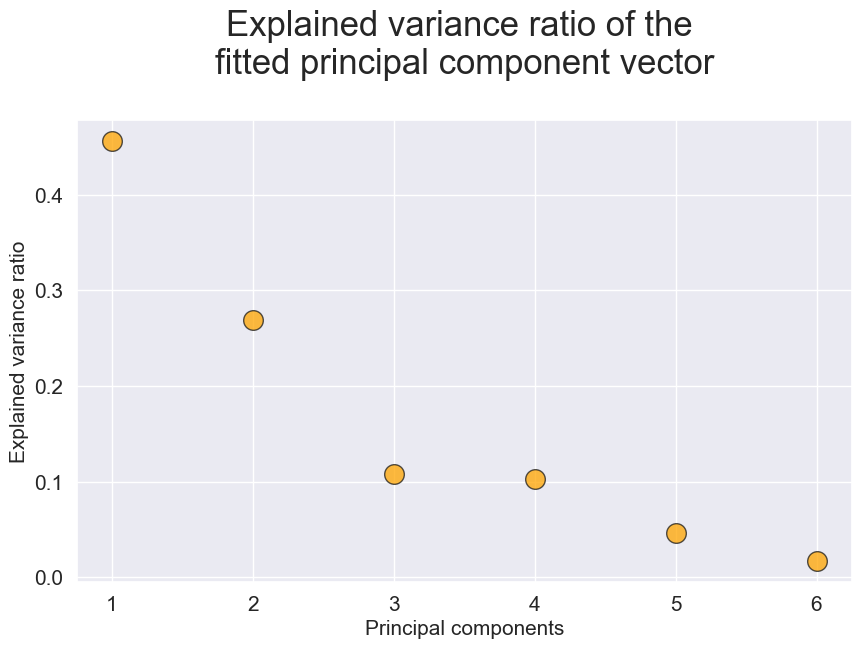

In [378]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [380]:
# Check the explained variances
pca.explained_variance_ratio_

array([0.45609037, 0.26946547, 0.10770689, 0.10324488, 0.04665828,
       0.01683412])

Note: We can see that the first dimension explains 45% of the data , and when combined with the second dimension, they explain 72% of the data. 
So, we can apply PCA with 2 components

In [392]:
pca = PCA(n_components=2)

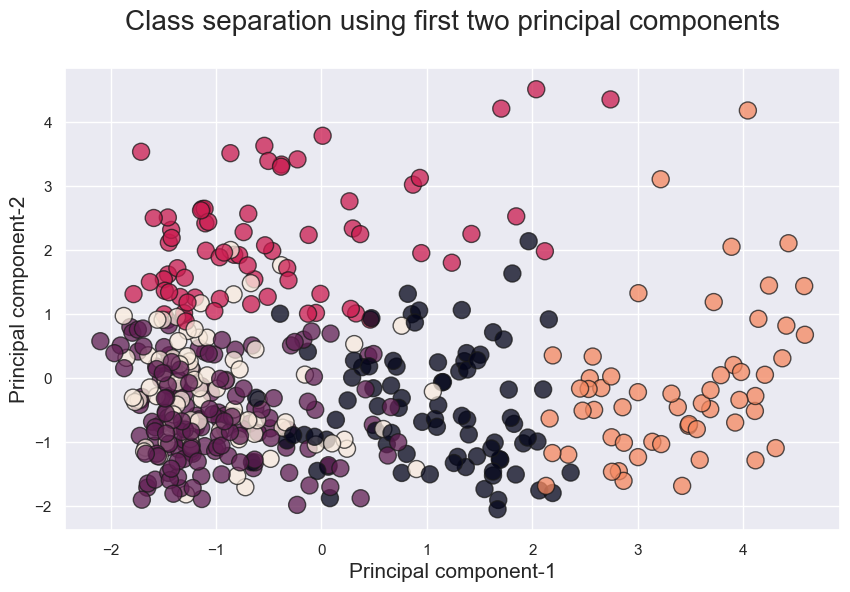

In [393]:
dfx_trans = pca.fit_transform(df_scaled.drop(['Channel', 'Region', 'Cluster'], axis=1))
dfx_trans = pd.DataFrame(data=dfx_trans)

plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df_scaled['Cluster'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- There are outliers in the dataset which must be handled
- The data should be scaled for learning
- The K-means clustering and hierrachy clustering can be used together to cross-check the optimum cluster number
- PCA has 2 components, the first hold 45% and the second hold 27% of the information

The result shows that we can segment customers into 5 groups. Every groups has its own need about the products and spending.
By understanding these groups, the company can focusing on their plan and strategy to gain more values